In [ ]:
 !pip install networkx~=2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
# matplotlib inline - the matplotlib plots will appear directly below the cell in which the plot function was called
# numpy - array , pandas - csv and other data structures
# networkx - used to create, manipulate, and study the structure, dynamics, and functions of complex graph networks


%matplotlib inline

import random
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# musae_ENGB_edges.csv - input file ( from and to info )
data = open('./data/musae_ENGB_edges.csv')

# next - to skip the heading
next(data)

# read_edgelist - read a directed graph from list of edges
g = nx.read_edgelist(data, create_using=nx.DiGraph(), delimiter=',', nodetype=int)

In [ ]:
# Returns a copy of the graph G with the nodes relabeled using consecutive integers.
g = nx.convert_node_labels_to_integers(G=g, first_label=0)

In [ ]:
# shallow copy
GCOPY = g.copy()

In [ ]:
print (nx.info(g))

DiGraph with 7126 nodes and 35324 edges


In [ ]:
# in degree
num=-99999999
node=0
sum=0
items = g.in_degree()
for item in items:
  sum+=item[1]
  if item[1]>num:
    num=item[1]
    node=item[0]
print("Maximum in degree - Node : ",node," In degree : ",num)
print("Average in degree - ",sum/len(items))

Maximum indegree - Node :  88  Indegree :  465
Average indegree -  4.957058658433904


In [ ]:
# out degree
num=-99999999
node=0
sum=0
items = g.out_degree()
for item in items:
  sum+=item[1]
  if item[1]>num:
    num=item[1]
    node=item[0]
print("Maximum out degree - Node : ",node," Out degree : ",num)
print("Average out degree - ",sum/len(items))

Maximum out degree - Node :  54  Out degree :  540
Average out degree -  4.957058658433904


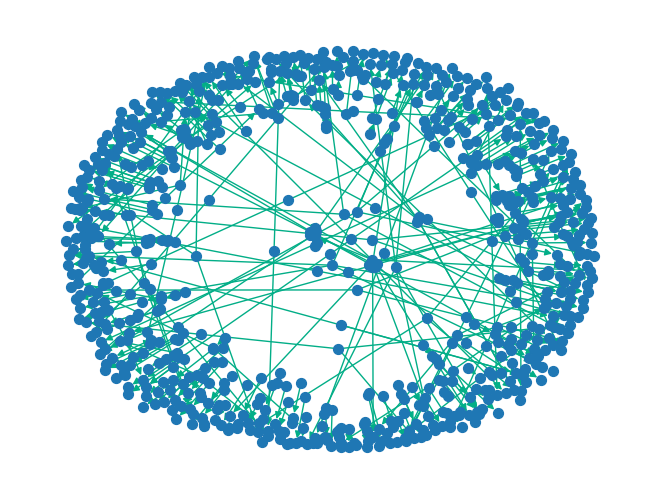

In [ ]:
# randomlyselecting 500 edges from graph g
sampled_edges = random.sample(g.edges, 500)

# intializing a sample directed graph
sampled_g = nx.DiGraph()

# adding the selected random edges to the sample graph
sampled_g.add_edges_from(sampled_edges)
sampled_g = nx.convert_node_labels_to_integers(G=sampled_g, first_label=0)

# Position nodes using Fruchterman-Reingold force-directed algorithm
subg = nx.spring_layout(sampled_g)

# draw graph
nx.draw(sampled_g, subg, node_color='#1F77B4', edge_color='#02AE87', width=1, edge_cmap='YlGnBu', node_size=50)

In [ ]:
# pickle - binary files (dump and load)
import pickle
import random
import time
st = time.time()  # start time

edges = dict()
for edge in g.edges:
    # from node - edge[0]
    # to   node - edge[1]
    edges[(edge[0], edge[1])] = 1  # { (from,to) : 1 if edge exists }

missing_edges = set([])
count = 0

# Number of total edges: 35324
while (len(missing_edges)<35324):
    if count % 50 == 0:
        print( 'iteration: ', count, '\tlen of miss edges: ', len(missing_edges), '\tedges left: ', 1768149-len(missing_edges))
    count += 1

    a=random.randint(0, 81305)
    b=random.randint(0, 81305)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            # adding points who less likely to be friends
            if nx.shortest_path_length(g,source=a,target=b) > 2:

                missing_edges.add((a,b))
            else:
                continue
        except:
                missing_edges.add((a,b))
    else:
        continue

end = time.time()  # end time
print ('\n\ntime taken: ', end-st)

iteration:  0 	len of miss edges:  0 	edges left:  1768149
iteration:  50 	len of miss edges:  50 	edges left:  1768099
iteration:  100 	len of miss edges:  100 	edges left:  1768049
iteration:  150 	len of miss edges:  150 	edges left:  1767999
iteration:  200 	len of miss edges:  200 	edges left:  1767949
iteration:  250 	len of miss edges:  250 	edges left:  1767899
iteration:  300 	len of miss edges:  300 	edges left:  1767849
iteration:  350 	len of miss edges:  350 	edges left:  1767799
iteration:  400 	len of miss edges:  400 	edges left:  1767749
iteration:  450 	len of miss edges:  450 	edges left:  1767699
iteration:  500 	len of miss edges:  500 	edges left:  1767649
iteration:  550 	len of miss edges:  550 	edges left:  1767599
iteration:  600 	len of miss edges:  600 	edges left:  1767549
iteration:  650 	len of miss edges:  650 	edges left:  1767499
iteration:  700 	len of miss edges:  700 	edges left:  1767449
iteration:  750 	len of miss edges:  750 	edges left:  176739

In [ ]:
pickle.dump(missing_edges,open('./data/twitch_missing_edges_final.p','wb'))

In [ ]:
len(missing_edges)

35324